# Assignment 1

### Part 1 - Basic python

For the simple python code to execute the diffusion iteration, I have defined an array $u0$ as the initial condition and $un1$ as an empty array to store next iteration. $u0$ is a grid of zeros with size $N$, and in this example values in a 2x2 section in the centre have been set to one. For loops are used to calculate the value of each point after one iteration using the reccurance relation given in the question. Results of this iteration calculation fill $un1$ then $un$ is updated to set initial condition for the next iteration. This matrix $un$ is returned and gives the new matrix after one step of the diffusion iteration. 

In [103]:
import numpy as np

def diffusion_iteration(un):
    un1 = np.empty_like(un)
    for i in range(1, N-1):
        for j in range(1, N-1):
            un1[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    un[:] = un1
    return np.around(un, 3)
    

N = 10
u0 = np.zeros([N, N], dtype = 'float64')
u0[int(N/2)-1:int(N/2)+1, int(N/2)-1:int(N/2)+1] = 1
print(u0)
for interations in range(0,100):
    print(diffusion_iteration(u0))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.5  0.5  0.25 0.   0.   0.  ]
 [0.   0.   0.   0.25 0.5  0.5  0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.  

To find the compute time of one iteration a Timer class is made. This uses the $time()$ function to call the seconds since the epoch (January 1, 1970, 00:00:00 (UTC)) as a floating point number at the start and end of an iteration and then find the difference to give the time for one iteration. 

In [2]:
import time

class Timer:    
    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, *args):
        self.end = time.time()
        self.interval = self.end - self.start

To find the relationship between the size of the array $N$ and compute time I have run the diffusion iteration function for one iteration over a range of N and plotted against compute time. The complexity of the runtime should be of order $N^2$ as we are using a 2d array. This is shown in the figure with the very similar trends in the two plots contain therein.

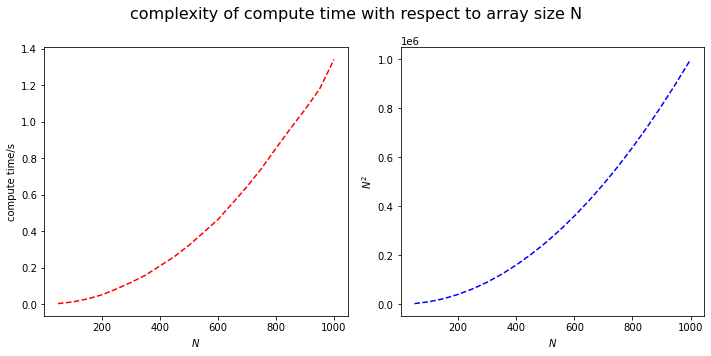

In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def diffusion_iteration(un, N):
    un1 = np.empty_like(un)
    for i in range(1, N-1):
        for j in range(1, N-1):
            un1[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    un[:] = un1
    return un
    

x = []
y = []

for array_size in range(50,1001,50):
    
    u0 = np.zeros([array_size, array_size], dtype = 'float64')
    u0[int(array_size/2)-1:int(array_size/2)+1, int(array_size/2)-1:int(array_size/2)+1] = 1
    mean_arr = np.empty(5)
    
    for iteration in range(0,5):
        with Timer() as t:
            diffusion_iteration(u0, array_size)
        mean_arr[iteration] = t.interval

    x.append(array_size)
    y.append(np.mean(mean_arr))
    
fig = plt.figure(figsize=(10.0, 5.0))

axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)

axes1.set_ylabel("compute time/s")
axes1.set_xlabel("$N$")
axes1.plot(x, y, 'r--')

axes2.set_ylabel("$N^2$")
axes2.set_xlabel("$N$")
axes2.plot(x,np.square(x), 'b--')
fig.suptitle('complexity of compute time with respect to array size N', fontsize = 16)
fig.tight_layout()


plt.show()

### Part 2 - Numba acceleration and parallelisation

**numba acceleration** - In this section another function **diffusion_iteration_jit** is created. This is a function decorated with **@numba.njit** this allows the function, once compiled, to run in machine code. The basic form of the decorator is **@jit**, here **njit** is used which is the same as stating **@numba.jit(nopython=true)**, this allows the fucntion to run entirly without the python interpreter once compiled. The function **diffusion_iteration_jit** is called once to compile to machine code before the results are collected as this computation will be much slower as the python interpreter is still being used at this stage.

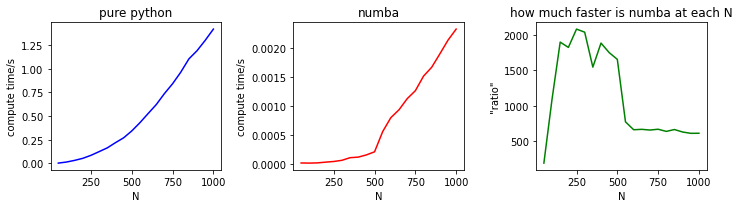

In [45]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import numba 

def diffusion_iteration(un, un1, N):
    for i in range(1, N-1):
        for j in range(1, N-1):
            un1[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    un[:] = un1
    return un

@numba.njit
def diffusion_iteration_jit(un, un1, N):
    for i in range(1, N-1):
        for j in range(1, N-1):
            un1[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    un[:] = un1
    return un

x = []
y = []
xjit =[]
yjit = []

array_size = 10
u0 = np.zeros([array_size, array_size])
u1 = np.empty_like(u0)
diffusion_iteration_jit(u0, u1, array_size)

maxN = 1001 

for array_size in range(50,maxN,50):
    
    u0 = np.zeros([array_size, array_size], dtype = 'float64')
    u1 = np.empty_like(u0)
    u0[int(array_size/2)-1:int(array_size/2)+1, int(array_size/2)-1:int(array_size/2)+1] = 1
    
    mean_arr = np.empty(5)
    
    for iter in range(0,5):
        with Timer() as t:
            diffusion_iteration(u0, u1, array_size)
        mean_arr[iter] = t.interval
    x.append(array_size)
    y.append(np.mean(mean_arr))
    
for array_size in range(50,maxN,50):    
    
    u0 = np.zeros([array_size, array_size], dtype = 'float64')
    u1 = np.empty_like(u0)
    u0[int(array_size/2)-1:int(array_size/2)+1, int(array_size/2)-1:int(array_size/2)+1] = 1 
    
    mean_arr_jit = np.empty(5)
    
    for iter in range(0,5):
        with Timer() as t:
            diffusion_iteration_jit(u0, u1, array_size)
        mean_arr_jit[iter] = t.interval
    xjit.append(array_size)
    yjit.append(np.mean(mean_arr_jit))
    
fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.plot(x, y, 'b-')
axes1.set_title('pure python')
axes1.set_xlabel('N')
axes1.set_ylabel('compute time/s')

axes2.plot(xjit, yjit, 'r-')
axes2.set_title('numba')
axes2.set_xlabel('N')
axes2.set_ylabel('compute time/s')

axes3.plot(x,np.divide(y,yjit), 'g-')
axes3.set_title('how much faster is numba at each N')
axes3.set_xlabel('N')
axes3.set_ylabel('"ratio"')

fig.tight_layout()

plt.show()

By comparing the compute times with and without **numba** it can be see the numba calculations still follow the $N^2$ dependence. How much quicker the computions are using **numba** is also plotted, interestingly it shows a much larger increase computation speeds at low $N$ values with it stabilsing to about about 500 times quicker above $N$=500.

**Parallelisation** - To parallelise the fucntion the **numba.prange** fucntion is used on the outer **for** loop. This will split the matrix into chunks equal to the amount of cores in the processor being used and allow these parallel threads to be executed simultaineously. I have a six core processor so theoretically i should expect a speed up of around 6 times.

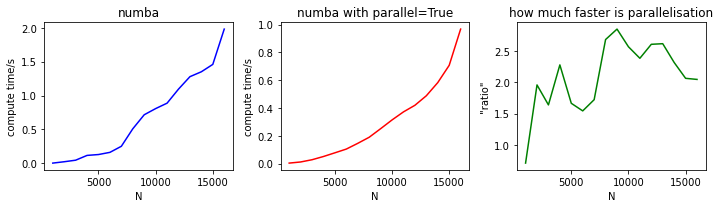

In [44]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import numba

@numba.njit
def diffusion_iteration_jit(un, un1, N):
    for i in range(1, N-1):
        for j in range(1, N-1):
            un1[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    un[:] = un1
    return un

@numba.njit(parallel = True)
def diffusion_iteration_jit_p(un, un1, N):
    for i in numba.prange(1, N-1):
        for j in range(1, N-1):
            un1[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    un[:] = un1
    return un

xjit = []
yjit = []
xjit_p = []
yjit_p = []

array_size = 10
u0 = np.zeros([array_size, array_size], dtype = 'float64')
u1 = np.empty_like(u0)

diffusion_iteration_jit(u0, u1, array_size)

maxN = 17000


for array_size in range(1000, maxN, 1000):
    
    u0 = np.zeros([array_size, array_size], dtype = 'float64')
    u1 = np.empty_like(u0)
    u0[int(array_size/2)-1:int(array_size/2)+1, int(array_size/2)-1:int(array_size/2)+1] = 1
    
    mean_arr_jit = np.empty(2)
    
    for j in range(0,2):
        with Timer() as t:
            diffusion_iteration_jit(u0, u1, array_size)
        mean_arr_jit[j] = t.interval
    xjit.append(array_size)
    yjit.append(np.mean(mean_arr_jit))

array_size = 10
u0 = np.zeros([array_size, array_size], dtype = 'float64')
u1 = np.empty_like(u0)

diffusion_iteration_jit_p(u0, u1, array_size)    
    
for array_size in range(1000, maxN, 1000):    
    
    u0 = np.zeros([array_size, array_size], dtype = 'float64')
    u1 = np.empty_like(u0)
    u0[int(array_size/2)-1:int(array_size/2)+1, int(array_size/2)-1:int(array_size/2)+1] = 1
    
    mean_arr_jit_p = np.empty(2)
    
    for j in range(0,2):
        with Timer() as t:
            diffusion_iteration_jit_p(u0, u1, array_size)
        mean_arr_jit_p[j] = t.interval
    xjit_p.append(array_size)
    yjit_p.append(np.mean(mean_arr_jit_p))
    
fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.plot(xjit, yjit, 'b-')
axes1.set_title('numba')
axes1.set_xlabel('N')
axes1.set_ylabel('compute time/s')

axes2.plot(xjit_p, yjit_p, 'r-')
axes2.set_title('numba with parallel=True')
axes2.set_xlabel('N')
axes2.set_ylabel('compute time/s')

axes3.plot(xjit,np.divide(yjit,yjit_p), 'g-')
axes3.set_title('how much faster is parallelisation')
axes3.set_xlabel('N')
axes3.set_ylabel('"ratio"')

fig.tight_layout()

plt.show()

### Part 3 - Visualisation

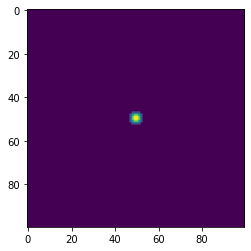

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
a = snapshots[0]
im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)

N = 100
u0 = np.zeros([N, N], dtype = 'float64')
u0[int(N/2)-2:int(N/2)+2, int(N/2)-2:int(N/2)+2] = 1

def diffusion_iteration(un):
    un1 = np.empty_like(un)
    for i in range(1, N-1):
        for j in range(1, N-1):
            un1[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    un[:] = un1
    return un   

def init():
    im.set_data(u0)
    return [im]

def func(frame, *fargs) 
